<a href="https://colab.research.google.com/github/CSL-348/Reinforcement_Learning/blob/main/Epsilon_Bandit_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# -*- coding: utf-8 -*-
"""
Epsilon-greedy action value method for solving the multi-armed bandit problem
The multi-armed Bandit Problem is also known as the k-armed bandit problem


@author: Aleksandar Haber
date: October 2022.
Last updated: November 01, 2022

"""

In [ ]:

import numpy as np

class BanditProblem(object):
    # trueActionValues - means of the normal distributions used to generate random rewards
    # the number of arms is equal to the number of entries in the trueActionValues
    # epsilon - epsilon probability value for selecting non-greedy actions
    # totalSteps - number of tatal steps used to simulate the solution of the mu



    def __init__(self,trueActionValues, epsilon, totalSteps):


        # number of arms
        self.armNumber=np.size(trueActionValues)

        # probability of ignoring the greedy selection and selecting
        # an arm by random
        self.epsilon=epsilon

        #current step
        self.currentStep=0

        #this variable tracks how many times a particular arm is being selected
        self.howManyTimesParticularArmIsSelected=np.zeros(self.armNumber)

        #total steps
        self.totalSteps=totalSteps

        # true action values that are expectations of rewards for arms
        self.trueActionValues=trueActionValues


        # vector that stores mean rewards of every arm
        self.armMeanRewards=np.zeros(self.armNumber)

        # variable that stores the current value of reward
        self.currentReward=0;

        # mean reward
        self.meanReward=np.zeros(totalSteps+1)

    # select actions according to the epsilon-greedy approach
    def selectActions(self):
        # draw a real number from the uniform distribution on [0,1]
        # this number is our probability of performing greedy actions
        # if this probabiligy is larger than epsilon, we perform greedy actions
        # otherwise, we randomly select an arm

        probabilityDraw=np.random.rand()


        # in the initial step, we select a random arm since all the mean rewards are zero
        # we also select a random arm if the probability is smaller than epsilon
        if (self.currentStep==0) or (probabilityDraw<=self.epsilon):
            selectedArmIndex=np.random.choice(self.armNumber)

        # we select the arm that has the largest past mean reward
        if (probabilityDraw>self.epsilon):
            selectedArmIndex=np.argmax(self.armMeanRewards)

        # increase the step value

        self.currentStep=self.currentStep+1

        # take a record that the particular arm is selected

        self.howManyTimesParticularArmIsSelected[selectedArmIndex]=self.howManyTimesParticularArmIsSelected[selectedArmIndex]+1


        # draw from the probability distribution of the selected arm the reward

        self.currentReward=np.random.normal(self.trueActionValues[selectedArmIndex],2)

        # update the estimate of the mean reward

        self.meanReward[self.currentStep]=self.meanReward[self.currentStep-1]+(1/(self.currentStep))*(self.currentReward-self.meanReward[self.currentStep-1])

        # update the estimate of the mean reward for the selected arm

        self.armMeanRewards[selectedArmIndex]=self.armMeanRewards[selectedArmIndex]+(1/(self.howManyTimesParticularArmIsSelected[selectedArmIndex]))*(self.currentReward-self.armMeanRewards[selectedArmIndex])

    # run the simulation
    def playGame(self):
        for i in range(self.totalSteps):
            self.selectActions()


    # reset all the variables to the original state
    def clearAll(self):
         #current step
        self.currentStep=0
         #this variable tracks how many times a particular arm is being selected
        self.howManyTimesParticularArmIsSelected=np.zeros(self.armNumber)

         # vector that stores mean rewards of every arm
        self.armMeanRewards=np.zeros(self.armNumber)

        # variable that stores the current value of reward
        self.currentReward=0;

        # mean reward
        self.meanReward=np.zeros(self.totalSteps+1)

In [ ]:
#Code to excute any .py file, get BanditProblem.py from https://github.com/AleksandarHaber/Multi-Armed-Bandit-Problem-and-Epsilon-Greedy-Action-Value-Method-in-Python/blob/main/BanditProblem.py
%run /content/BanditProblem.py

# code to Execute Specific Function

# from your_module import your_function
# your_function()

# -*- coding: utf-8 -*-
"""
Created on Fri Oct 28 19:46:56 2022

@author: Driver code for using the BanditProblem class
This file demonstrates how to solve the multi-armed bandit problem by using
the epsilon-greedy action value approach

"""

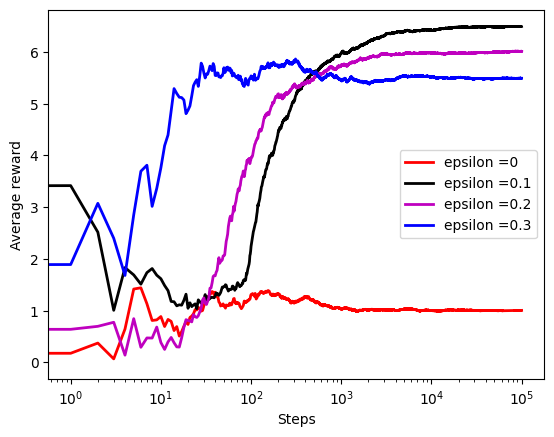

In [ ]:

# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from BanditProblem import BanditProblem

# these are the means of the action values that are used to simulate the multi-armed bandit problem
actionValues=np.array([1,4,2,0,7,1,-1])

# epsilon values to investigate the performance of the method
epsilon1=0
epsilon2=0.1
epsilon3=0.2
epsilon4=0.3

# total number of simulation steps
totalSteps=100000

# create four different bandit problems and simulate the method performance
Bandit1=BanditProblem(actionValues, epsilon1, totalSteps)
Bandit1.playGame()
epsilon1MeanReward=Bandit1.meanReward
Bandit2=BanditProblem(actionValues, epsilon2, totalSteps)
Bandit2.playGame()
epsilon2MeanReward=Bandit2.meanReward
Bandit3=BanditProblem(actionValues, epsilon3, totalSteps)
Bandit3.playGame()
epsilon3MeanReward=Bandit3.meanReward
Bandit4=BanditProblem(actionValues, epsilon4, totalSteps)
Bandit4.playGame()
epsilon4MeanReward=Bandit4.meanReward

#plot the results
plt.plot(np.arange(totalSteps+1),epsilon1MeanReward,linewidth=2, color='r', label='epsilon =0')
plt.plot(np.arange(totalSteps+1),epsilon2MeanReward,linewidth=2, color='k', label='epsilon =0.1')
plt.plot(np.arange(totalSteps+1),epsilon3MeanReward,linewidth=2, color='m', label='epsilon =0.2')
plt.plot(np.arange(totalSteps+1),epsilon4MeanReward,linewidth=2, color='b', label='epsilon =0.3')
plt.xscale("log")
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.savefig('results.png',dpi=300)
plt.show()